# Customer Segmentation: Clustering

___

## Importing libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

___

## Load data
Data source: https://www.kaggle.com/rodsaldanha/arketing-campaign

In [5]:
df = pd.read_csv('../data/marketing_campaign.csv', sep=';')

In [6]:
df.head().T

0           1           2           3  \
ID                         5524        2174        4141        6182   
Year_Birth                 1957        1954        1965        1984   
Education            Graduation  Graduation  Graduation  Graduation   
Marital_Status           Single      Single    Together    Together   
Income                  58138.0     46344.0     71613.0     26646.0   
Kidhome                       0           1           0           1   
Teenhome                      0           1           0           0   
Dt_Customer          2012-09-04  2014-03-08  2013-08-21  2014-02-10   
Recency                      58          38          26          26   
MntWines                    635          11         426          11   
MntFruits                    88           1          49           4   
MntMeatProducts             546           6         127          20   
MntFishProducts             172           2         111          10   
MntSweetProducts             88           1          21           3   
MntGoldProds                 88           6          42           5   
NumDealsPurchases             3           2           1           2   
NumWebPurchases               8           1           8           2   
NumCatalogPurchases          10           1           2           0   
NumStorePurchases             4           2          10           4   
NumWebVisitsMonth             7           5           4           6   
AcceptedCmp3                  0           0           0           0   
AcceptedCmp4                  0           0           0           0   
AcceptedCmp5                  0           0           0           0   
AcceptedCmp1                  0           0           0           0   
AcceptedCmp2                  0           0           0           0   
Complain                      0           0           0           0   
Z_CostContact                 3           3           3           3   
Z_Revenue                    11          11          11          11   
Response                      1           0           0           0   

                              4  
ID                         5324  
Year_Birth                 1981  
Education                   PhD  
Marital_Status          Married  
Income                  58293.0  
Kidhome                       1  
Teenhome                      0  
Dt_Customer          2014-01-19  
Recency                      94  
MntWines                    173  
MntFruits                    43  
MntMeatProducts             118  
MntFishProducts              46  
MntSweetProducts             27  
MntGoldProds                 15  
NumDealsPurchases             5  
NumWebPurchases               5  
NumCatalogPurchases           3  
NumStorePurchases             6  
NumWebVisitsMonth             5  
AcceptedCmp3                  0  
AcceptedCmp4                  0  
AcceptedCmp5                  0  
AcceptedCmp1                  0  
AcceptedCmp2                  0  
Complain                      0  
Z_CostContact                 3  
Z_Revenue                    11  
Response                      0

In [7]:
df.shape

(2240, 29)

___

## Data Cleaning and Preparation

### Drop columns

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
df.drop(['ID', 'Education', 'Marital_Status','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response'], axis=1, inplace=True)

### Check data types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Income               2216 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Dt_Customer          2240 non-null   object 
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

### Change to datetime format

In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [12]:
df.head()

Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  \
0        1957  58138.0        0         0  2012-09-04       58       635   
1        1954  46344.0        1         1  2014-03-08       38        11   
2        1965  71613.0        0         0  2013-08-21       26       426   
3        1984  26646.0        1         0  2014-02-10       26        11   
4        1981  58293.0        1         0  2014-01-19       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  Z_CostContact  Z_Revenue  
0                  4                  7              3         11  
1                  2                  5              3         11  
2                 10                  4              3         11  
3                  4                  6              3         11  
4                  6                  5              3         11

### Check for nulls

In [13]:
df.isnull().sum()

Year_Birth              0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Z_CostContact           0
Z_Revenue               0
dtype: int64

#### Drop nulls values

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().any()

Year_Birth             False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
Z_CostContact          False
Z_Revenue              False
dtype: bool

___

### Merge amount spend, total children and websites visits

In [16]:
df['total_amount_spend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['total_children'] = df['Kidhome'] + df['Teenhome']
df['customer_purchase_webvisits'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases']  + df['NumStorePurchases'] + df['NumWebVisitsMonth']  

In [17]:
df.head().T

0                    1  \
Year_Birth                                  1957                 1954   
Income                                   58138.0              46344.0   
Kidhome                                        0                    1   
Teenhome                                       0                    1   
Dt_Customer                  2012-09-04 00:00:00  2014-03-08 00:00:00   
Recency                                       58                   38   
MntWines                                     635                   11   
MntFruits                                     88                    1   
MntMeatProducts                              546                    6   
MntFishProducts                              172                    2   
MntSweetProducts                              88                    1   
MntGoldProds                                  88                    6   
NumDealsPurchases                              3                    2   
NumWebPurchases                                8                    1   
NumCatalogPurchases                           10                    1   
NumStorePurchases                              4                    2   
NumWebVisitsMonth                              7                    5   
Z_CostContact                                  3                    3   
Z_Revenue                                     11                   11   
total_amount_spend                          1617                   27   
total_children                                 0                    2   
customer_purchase_webvisits                   32                   11   

                                               2                    3  \
Year_Birth                                  1965                 1984   
Income                                   71613.0              26646.0   
Kidhome                                        0                    1   
Teenhome                                       0                    0   
Dt_Customer                  2013-08-21 00:00:00  2014-02-10 00:00:00   
Recency                                       26                   26   
MntWines                                     426                   11   
MntFruits                                     49                    4   
MntMeatProducts                              127                   20   
MntFishProducts                              111                   10   
MntSweetProducts                              21                    3   
MntGoldProds                                  42                    5   
NumDealsPurchases                              1                    2   
NumWebPurchases                                8                    2   
NumCatalogPurchases                            2                    0   
NumStorePurchases                             10                    4   
NumWebVisitsMonth                              4                    6   
Z_CostContact                                  3                    3   
Z_Revenue                                     11                   11   
total_amount_spend                           776                   53   
total_children                                 0                    1   
customer_purchase_webvisits                   25                   14   

                                               4  
Year_Birth                                  1981  
Income                                   58293.0  
Kidhome                                        1  
Teenhome                                       0  
Dt_Customer                  2014-01-19 00:00:00  
Recency                                       94  
MntWines                                     173  
MntFruits                                     43  
MntMeatProducts                              118  
MntFishProducts                               46  
MntSweetProducts                              27  
MntGoldProds                                  15  
NumDealsPurchases       

#### Drop columns

In [18]:
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue', 'total_amount_spend',
       'total_children', 'customer_purchase_webvisits'],
      dtype='object')

In [19]:
df.drop(['Kidhome', 'Teenhome','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
         'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
         'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'], axis=1, inplace=True)

___

In [20]:
df.head().T

0                    1  \
Year_Birth                                  1957                 1954   
Income                                   58138.0              46344.0   
Dt_Customer                  2012-09-04 00:00:00  2014-03-08 00:00:00   
Recency                                       58                   38   
Z_CostContact                                  3                    3   
Z_Revenue                                     11                   11   
total_amount_spend                          1617                   27   
total_children                                 0                    2   
customer_purchase_webvisits                   32                   11   

                                               2                    3  \
Year_Birth                                  1965                 1984   
Income                                   71613.0              26646.0   
Dt_Customer                  2013-08-21 00:00:00  2014-02-10 00:00:00   
Recency                                       26                   26   
Z_CostContact                                  3                    3   
Z_Revenue                                     11                   11   
total_amount_spend                           776                   53   
total_children                                 0                    1   
customer_purchase_webvisits                   25                   14   

                                               4  
Year_Birth                                  1981  
Income                                   58293.0  
Dt_Customer                  2014-01-19 00:00:00  
Recency                                       94  
Z_CostContact                                  3  
Z_Revenue                                     11  
total_amount_spend                           422  
total_children                                 1  
customer_purchase_webvisits                   24

___

### Add customer association period

In [21]:
dt = pd.to_datetime('2020/12/31', format = '%Y-%m-%d') #set a custom date for check
df['length_of_association'] = (dt - df['Dt_Customer']).dt.days
df.sample(20).T

1484                 1590  \
Year_Birth                                  1976                 1962   
Income                                   75484.0              31497.0   
Dt_Customer                  2012-08-02 00:00:00  2012-12-06 00:00:00   
Recency                                       50                   22   
Z_CostContact                                  3                    3   
Z_Revenue                                     11                   11   
total_amount_spend                          1159                  155   
total_children                                 1                    1   
customer_purchase_webvisits                   22                   18   
length_of_association                       3073                 2947   

                                            134                  1672  \
Year_Birth                                  1964                 1986   
Income                                   41551.0              80141.0   
Dt_Customer                  2013-08-14 00:00:00  2013-01-11 00:00:00   
Recency                                       51                   20   
Z_CostContact                                  3                    3   
Z_Revenue                                     11                   11   
total_amount_spend                           279                 2091   
total_children                                 2                    0   
customer_purchase_webvisits                   24                   28   
length_of_association                       2696                 2911   

                                            106                  1019  \
Year_Birth                                  1964                 1976   
Income                                   49096.0              20180.0   
Dt_Customer                  2013-09-24 00:00:00  2013-02-20 00:00:00   
Recency                                       15                   27   
Z_CostContact                                  3                    3   
Z_Revenue                                     11                   11   
total_amount_spend                           187                  137   
total_children                                 2                    0   
customer_purchase_webvisits                   20                   15   
length_of_association                       2655                 2871   

                                            765                  146   \
Year_Birth                                  1955                 1975   
Income                                   48726.0              23957.0   
Dt_Customer                  2013-04-27 00:00:00  2012-10-28 00:00:00   
Recency                                       90                   47   
Z_CostContact                                  3                    3   
Z_Revenue                                     11                   11   
total_amount_spend                           242                   68   
total_children                                 1                    1   
customer_purchase_webvisits                   18                   12   
length_of_association                       2805                 2986   

                                            341                  412   \
Year_Birth                                  1986                 1955   
Income                                   41411.0              66465.0   
Dt_Customer                  2013-12-07 00:00:00  2013-03-30 00:00:00   
Recency                                       11                    1   
Z_CostContact                                  3                    3   
Z_Revenue                                     11                   11   
total_amount_spend                           139                 1485   
total_children                                 0                    1   
customer_purchase_webvisits                   14                   41   
length_of_association                       2581                 2833   

                        

In [22]:
df['length_of_association'] = (df['length_of_association']/30).astype('int')

In [23]:
df.drop(['Dt_Customer'], axis=1, inplace=True)

___

In [24]:
df.head().T

0        1        2        3        4
Year_Birth                    1957.0   1954.0   1965.0   1984.0   1981.0
Income                       58138.0  46344.0  71613.0  26646.0  58293.0
Recency                         58.0     38.0     26.0     26.0     94.0
Z_CostContact                    3.0      3.0      3.0      3.0      3.0
Z_Revenue                       11.0     11.0     11.0     11.0     11.0
total_amount_spend            1617.0     27.0    776.0     53.0    422.0
total_children                   0.0      2.0      0.0      1.0      1.0
customer_purchase_webvisits     32.0     11.0     25.0     14.0     24.0
length_of_association          101.0     83.0     89.0     83.0     84.0

### Add age for each customer

In [25]:
df['age'] = 2021 - df['Year_Birth']

In [26]:
df.drop(['Year_Birth'], axis=1, inplace=True)

In [27]:
df.describe().T

count          mean           std     min  \
Income                       2216.0  52247.251354  25173.076661  1730.0   
Recency                      2216.0     49.012635     28.948352     0.0   
Z_CostContact                2216.0      3.000000      0.000000     3.0   
Z_Revenue                    2216.0     11.000000      0.000000    11.0   
total_amount_spend           2216.0    607.075361    602.900476     5.0   
total_children               2216.0      0.947202      0.749062     0.0   
customer_purchase_webvisits  2216.0     20.199910      7.283193     0.0   
length_of_association        2216.0     90.539711      6.762415    79.0   
age                          2216.0     52.179603     11.985554    25.0   

                                 25%      50%      75%       max  
Income                       35303.0  51381.5  68522.0  666666.0  
Recency                         24.0     49.0     74.0      99.0  
Z_CostContact                    3.0      3.0      3.0       3.0  
Z_Revenue                       11.0     11.0     11.0      11.0  
total_amount_spend              69.0    396.5   1048.0    2525.0  
total_children                   0.0      1.0      1.0       3.0  
customer_purchase_webvisits     14.0     19.0     25.0      46.0  
length_of_association           85.0     91.0     96.0     102.0  
age                             44.0     51.0     62.0     128.0

In [28]:
df.drop(['Z_CostContact', 'Z_Revenue','total_children'], axis=1, inplace=True) #std is too low

___

## Data Exploration & Visualizations

In [29]:
df.columns

Index(['Income', 'Recency', 'total_amount_spend',
       'customer_purchase_webvisits', 'length_of_association', 'age'],
      dtype='object')

### Boxplots

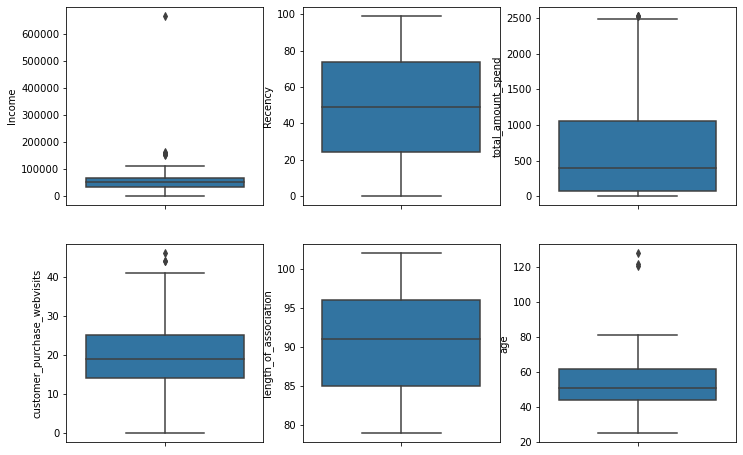

In [30]:
fig, axs = plt.subplots(figsize=(12,8), nrows=2, ncols=3, sharey=False)
sns.boxplot(y = df['Income'], ax = axs[0][0])
sns.boxplot(y = df['Recency'], ax = axs[0][1])
sns.boxplot(y = df['total_amount_spend'], ax = axs[0][2])
sns.boxplot(y = df['customer_purchase_webvisits'], ax = axs[1][0])
sns.boxplot(y = df['length_of_association'], ax = axs[1][1])
sns.boxplot(y = df['age'], ax = axs[1][2])
plt.show()

#### Remove outliers

In [31]:
df['customer_purchase_webvisits'].clip(
    lower = df['customer_purchase_webvisits'].quantile(0.05), 
    upper = df['customer_purchase_webvisits'].quantile(0.95), inplace=True)

df['total_amount_spend'].clip(
    lower = df['total_amount_spend'].quantile(0.05), 
    upper = df['total_amount_spend'].quantile(0.95), inplace=True)

df['Income'].clip(
    lower = df['Income'].quantile(0.05), 
    upper = df['Income'].quantile(0.95), inplace=True)

df['age'].clip(
    lower = df['age'].quantile(0.05), 
    upper = df['age'].quantile(0.95), inplace=True)

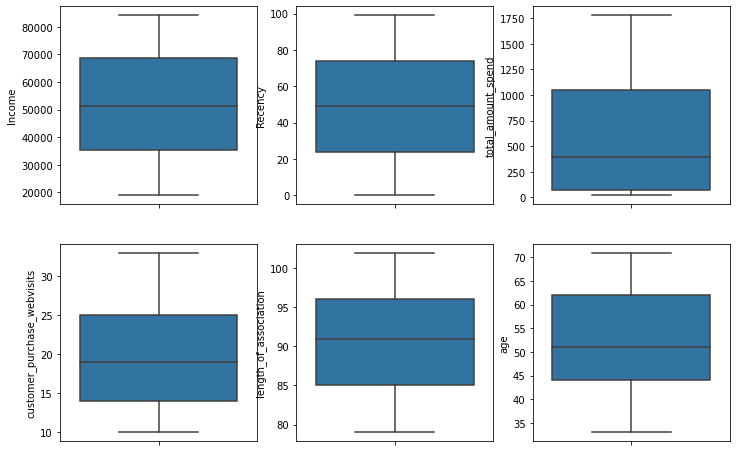

In [32]:
fig, axs = plt.subplots(figsize=(12,8), nrows=2, ncols=3, sharey=False)
sns.boxplot(y = df['Income'], ax = axs[0][0])
sns.boxplot(y = df['Recency'], ax = axs[0][1])
sns.boxplot(y = df['total_amount_spend'], ax = axs[0][2])
sns.boxplot(y = df['customer_purchase_webvisits'], ax = axs[1][0])
sns.boxplot(y = df['length_of_association'], ax = axs[1][1])
sns.boxplot(y = df['age'], ax = axs[1][2])
plt.show()

___

### Income vs Amount spend

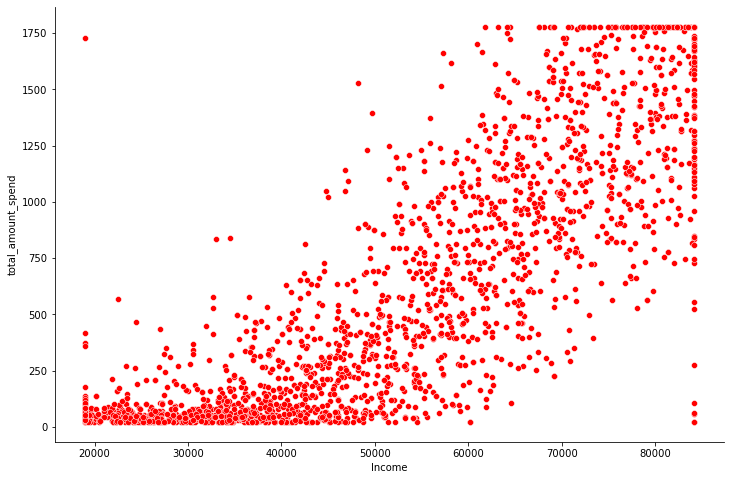

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Income', y = 'total_amount_spend', data = df, color = 'r')
sns.despine()
plt.show()

more income, greater total spend amount 

___

### Income vs Amount spend vs Association time

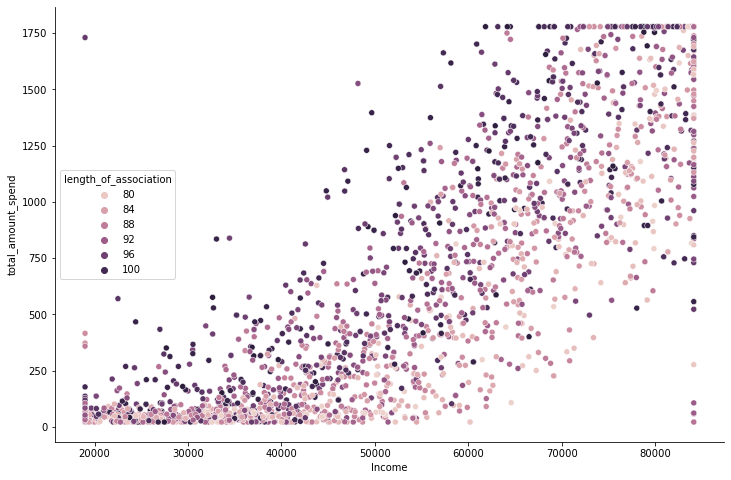

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Income', y = 'total_amount_spend', hue = 'length_of_association', data = df, color = 'r')
sns.despine()
plt.show()

there is no a clear relationship 

___

### Income vs Association

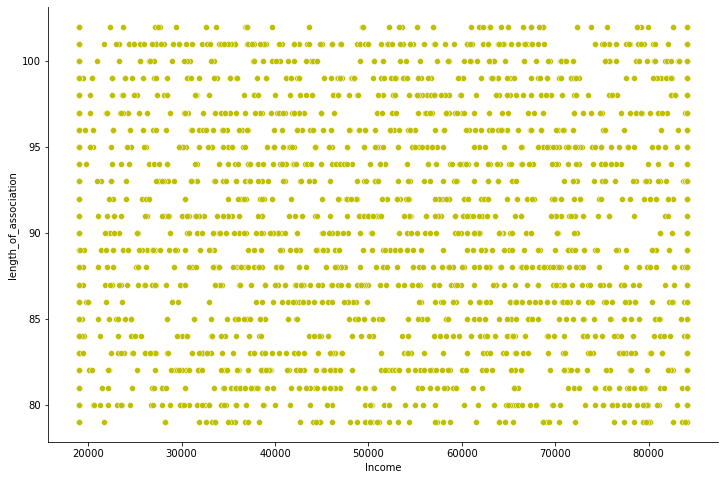

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Income', y = 'length_of_association', data = df, color = 'y')
sns.despine()
plt.show()

there is no relationship

___

### Income vs Webvisits

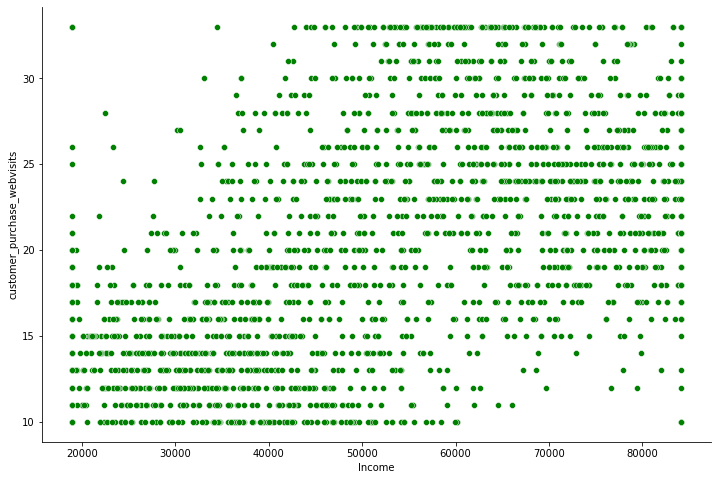

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Income', y = 'customer_purchase_webvisits', data = df, color = 'g')
sns.despine()
plt.show()

there is no relationship 

___

### Age vs Recency

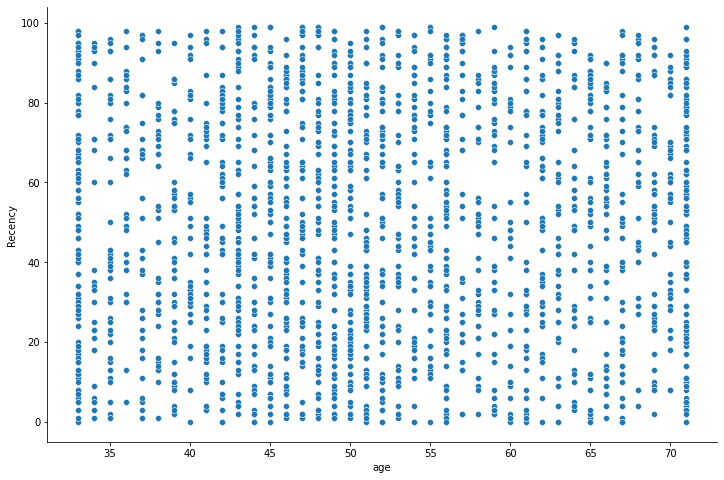

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'age', y = 'Recency', data = df)
sns.despine()
plt.show()

there is no relationship 

___

### Length of association vs  Income vs Total amount spend

In [38]:
fig = px.scatter_3d(df, x = 'length_of_association', y = 'Income', z = 'total_amount_spend')
fig.show()

### Save data for training

In [39]:
df[['length_of_association', 'Income', 'total_amount_spend']].to_csv('../data/prepared_data.csv', index = False)

___

## Machine Learning for Clustering

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize

### Load  prepared data

In [41]:
df = pd.read_csv('../data/prepared_data.csv')

In [42]:
df.head()

length_of_association   Income  total_amount_spend
0                    101  58138.0              1617.0
1                     83  46344.0                27.0
2                     89  71613.0               776.0
3                     83  26646.0                53.0
4                     84  58293.0               422.0

In [43]:
df.describe()

length_of_association        Income  total_amount_spend
count            2216.000000   2216.000000         2216.000000
mean               90.539711  51751.716832          595.727775
std                 6.762415  19773.406544          575.677268
min                79.000000  18985.500000           22.000000
25%                85.000000  35303.000000           69.000000
50%                91.000000  51381.500000          396.500000
75%                96.000000  68522.000000         1048.000000
max               102.000000  84130.000000         1778.250000

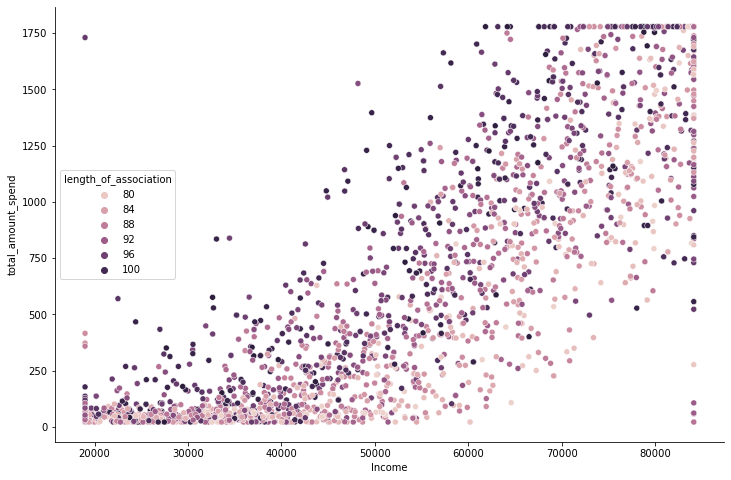

In [44]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Income', y = 'total_amount_spend', hue = 'length_of_association', data = df)
sns.despine()
plt.show()

### StandardScaler 
Removes the mean and scales each feature/variable to unit variance.

In [45]:
scaler = StandardScaler()
X_std = pd.DataFrame(data = scaler.fit_transform(df), columns=df.columns)
X_std.describe()

length_of_association        Income  total_amount_spend
count           2.216000e+03  2.216000e+03        2.216000e+03
mean           -8.456934e-17  1.361163e-16       -3.657323e-18
std             1.000226e+00  1.000226e+00        1.000226e+00
min            -1.706834e+00 -1.657459e+00       -9.968385e-01
25%            -8.193762e-01 -8.320483e-01       -9.151771e-01
50%             6.808111e-02 -1.872719e-02       -3.461536e-01
75%             8.076289e-01  8.483145e-01        7.858123e-01
max             1.695086e+00  1.637836e+00        2.054605e+00

### Normalize
Normalization refers to rescaling real-valued numeric attributes into a 0 to 1 range.

In [46]:
X = pd.DataFrame(data = normalize(X_std, norm = 'l2'), columns=X_std.columns)
X.head()

length_of_association    Income  total_amount_spend
0               0.651090  0.135946            0.746727
1              -0.736150 -0.180570           -0.652287
2              -0.211510  0.933081            0.290900
3              -0.576218 -0.656183           -0.487233
4              -0.907444  0.310416           -0.283174

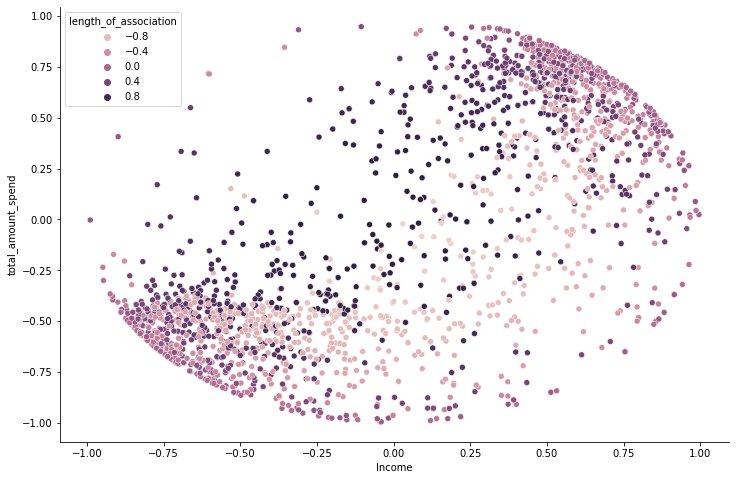

In [47]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Income', y = 'total_amount_spend', hue = 'length_of_association', data = X)
sns.despine()
plt.show()

___

### Kmeans model

k-means clustering tries to group similar kinds of items in form of clusters. It finds the similarity between the items and groups them into the clusters. K-means clustering algorithm works in three steps.

In [48]:
weighted_cluster_sum_of_squares = []

for k in range(2,20):
    kmeans_model = KMeans(n_clusters= k, random_state = 123)
    kmeans_model.fit(X)
    weighted_cluster_sum_of_squares.append(kmeans_model.inertia_)  

### Within Cluster Sum of Squares (WCSS)
Which measures the squared average distance of all the points within a cluster to the cluster centroid. 

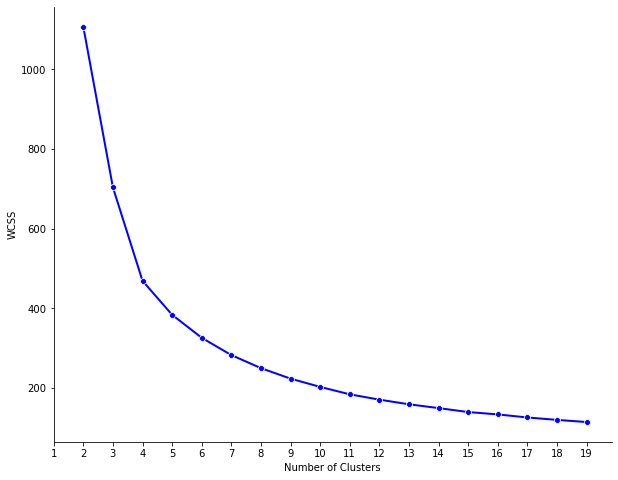

In [49]:
plt.figure(figsize=(10,8))
sns.lineplot(x = range(2,20), y = weighted_cluster_sum_of_squares, linewidth  = 2, color = 'blue', marker= '8')
sns.despine()
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(1,20,1))
plt.ylabel('WCSS')
plt.show()

___

### Silhouette 

refers to a method of interpretation and validation of consistency within clusters of data. 

In [50]:
silhoutte_avg = []

for num_clusters in range(2,20):
    kmeans_model = KMeans(n_clusters= num_clusters, random_state = 123)
    kmeans_model.fit(X)
    cluster_labels = kmeans_model.labels_
    silhoutte_avg.append(silhouette_score(X, cluster_labels))
    
silhoutte_avg

[0.47043961895004144,
 0.46691971580508407,
 0.46834719755918397,
 0.4358331512741329,
 0.4162797806941069,
 0.39542766619018616,
 0.4092490160375258,
 0.3816632843782846,
 0.3697692248346547,
 0.38481936177060666,
 0.36586545225855477,
 0.3715915398232948,
 0.349752473499276,
 0.34979394646371537,
 0.3490931154867695,
 0.3484527689199317,
 0.34583826657838673,
 0.3437867006615386]

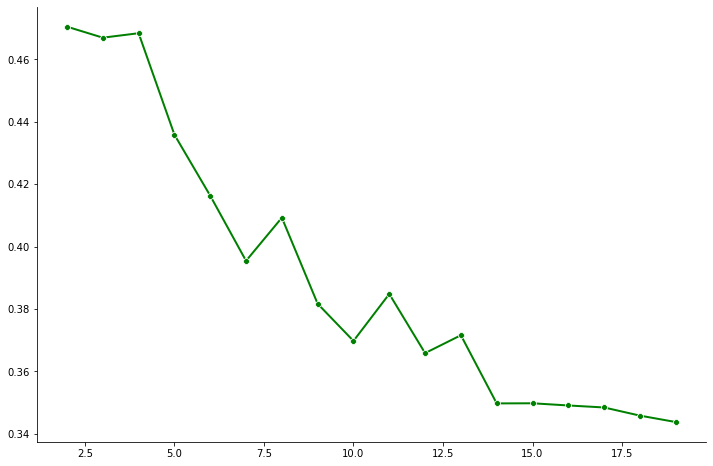

In [51]:
plt.figure(figsize=(12,8))
sns.lineplot(x = range(2,20), y = silhoutte_avg, linewidth  = 2, color = 'green', marker= '8')
sns.despine()
plt.show()

The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

___

### Kmeans model for K equal 4

In [52]:
kmeans_model = KMeans(n_clusters= 4, random_state = 123)  
kmeans_model.fit(X)  
X['cluster_labels'] = kmeans_model.labels_
X.head()

length_of_association    Income  total_amount_spend  cluster_labels
0               0.651090  0.135946            0.746727               0
1              -0.736150 -0.180570           -0.652287               2
2              -0.211510  0.933081            0.290900               3
3              -0.576218 -0.656183           -0.487233               2
4              -0.907444  0.310416           -0.283174               3

### Mean of the clusters

In [53]:
X.groupby('cluster_labels').mean()

length_of_association    Income  total_amount_spend
cluster_labels                                                     
0                            0.522807  0.468234            0.553998
1                            0.546616 -0.496422           -0.490208
2                           -0.553556 -0.424636           -0.561632
3                           -0.498993  0.595593            0.395942

In [54]:
centers = kmeans_model.cluster_centers_
centers

array([[ 0.52280683,  0.4682336 ,  0.55399791],
       [ 0.54661603, -0.49642203, -0.49020768],
       [-0.55355614, -0.4246355 , -0.56163158],
       [-0.49899326,  0.5955929 ,  0.39594229]])

In [55]:
df['cluster_labels'] = kmeans_model.labels_
df.groupby('cluster_labels').mean()

length_of_association        Income  total_amount_spend
cluster_labels                                                         
0                           96.626415  68643.659434         1214.864623
1                           96.191304  35537.686957          187.433043
2                           84.633956  37704.769470          120.211838
3                           84.816631  71769.793177         1047.557569

### Representation of the Clusters

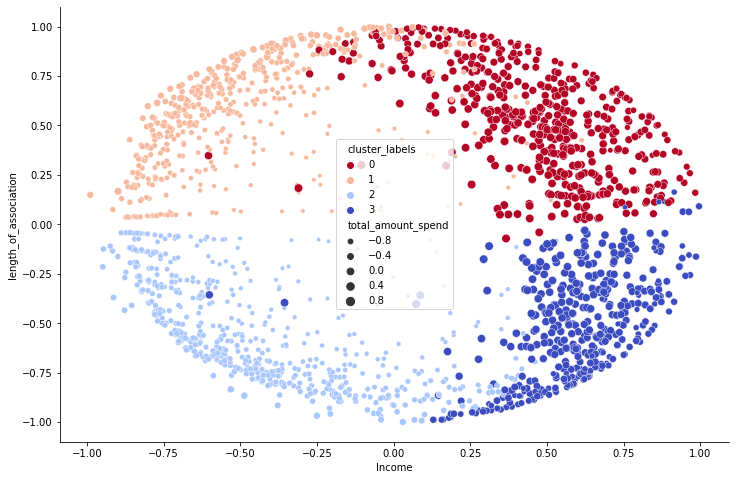

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Income', size = 'total_amount_spend', y = 'length_of_association', hue = 'cluster_labels', data = X, palette = 'coolwarm_r')
sns.despine()
plt.show()

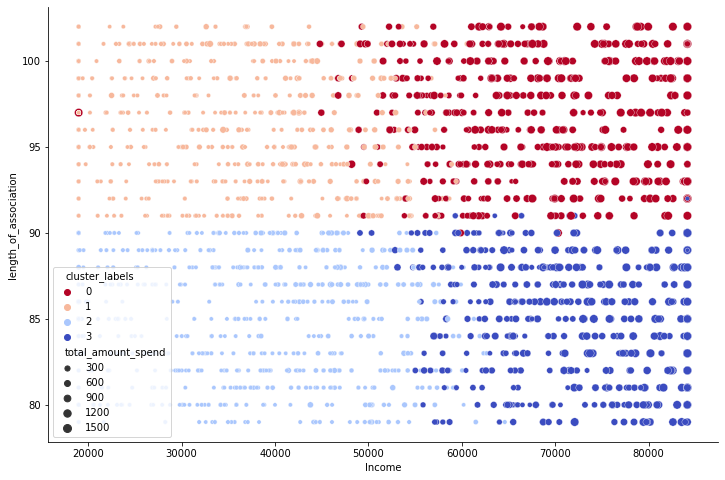

In [57]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'Income', size = 'total_amount_spend', y = 'length_of_association', hue = 'cluster_labels', data = df, palette = 'coolwarm_r')
sns.despine()
plt.show()

In [58]:
fig = px.scatter_3d(X, x = 'length_of_association', y = 'Income', z = 'total_amount_spend', color = 'cluster_labels')
fig.show()